In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Regression modeling with more than 2 categories

In the last lesson we looked at the Titanic data and simply tried to predict a binary value (Survived? Y/N) This is called **Binomial Logistic** regression. Frequently, we need to make predictions of a value with more than 2 categories, such as genre classification. In this case, we need to perform **Multinomial Logistic Regression**.

The actual modeling process is not that different from a coding perspective. We will use a different dataset, Iris, to illustrate. (Download the `iris.csv` file from Canvas).

In [2]:
iris = pd.read_csv('../Datasets/iris.csv')
iris.size 

750

There are 750 rows of data in this dataset.

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's see how many categories of Iris flowers are there?

In [4]:
iris['Species'].unique() #gives the unique list of events in the specified column

array(['setosa', 'versicolor', 'virginica'], dtype=object)

OK, so we will want to see if any of the features (various measurements) can predict the different species.

As always, let us graph our data first to get a sense of the variability and relatedness of each feature:

<AxesSubplot: >

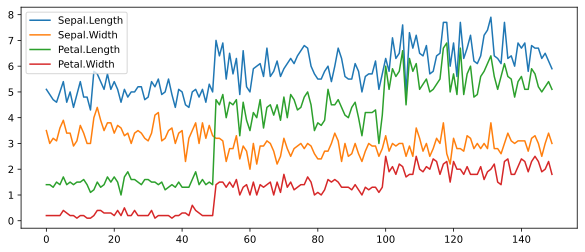

In [5]:
iris.plot(figsize=(10,4))

### Normalization and Standardization
#### Do we need to normalize these features? 

Normalization (converting to values between 0 and 1) helps ensure that your training model will be less sensitive to the scale of features. This is particularly useful when you have one feature with values in the 100s or 1000s when you have another feature (or features) with values in single or double digits.

Another process, **standardization** is also commonly used in data modeling and machine learning. Standardization is helpful when you have features that are measured in different scales (e.g., recall the athlete data with body temperature in F, weight in lbs, and %body fat --these are very different scales.)  Standardization is the process of transforming a range of values such that the mean becomes zero and the standard deviation is 1. 

In this case, all our measurements are using the same scale (cm) so we don't need to standardize. Normalization here might actually be a bad idea, since (1) they are all using single ditits, meaning they are fairly close together. (2) By converting to a scale from 0-1 we may actually be destroying existing relations between our measurements here which are all on the same scale. In other words,  the scale between our data features probably matters so you want to keep them as-is in your dataset.

## Correlation

Again, let's plot the correlation matrix. As before, remove the 'answer' column because you only want to show correlations between features.

In [6]:
iris.corr()

/var/folders/jr/tf9k36ws1956sfj0w8ybnj2m0000gn/T/ipykernel_43826/2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


Hmm... "Petal Length" & "Sepal Length" are correlated with an r value of .87, and "Petal Length & Petal Width" are correlated with an r value of .96!

What this means is that the model may struggle to find the optimal "fit." We'll come back to what we should do about this *later in the notebook*.

Let's also look to see if the means and spread of the values appear different across our four feature categories:

In [7]:
#Here is a handy function, btw
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot: title={'center': 'Sepal.Length'}, xlabel='[Species]'>,
        <AxesSubplot: title={'center': 'Sepal.Width'}, xlabel='[Species]'>],
       [<AxesSubplot: title={'center': 'Petal.Length'}, xlabel='[Species]'>,
        <AxesSubplot: title={'center': 'Petal.Width'}, xlabel='[Species]'>]],
      dtype=object)

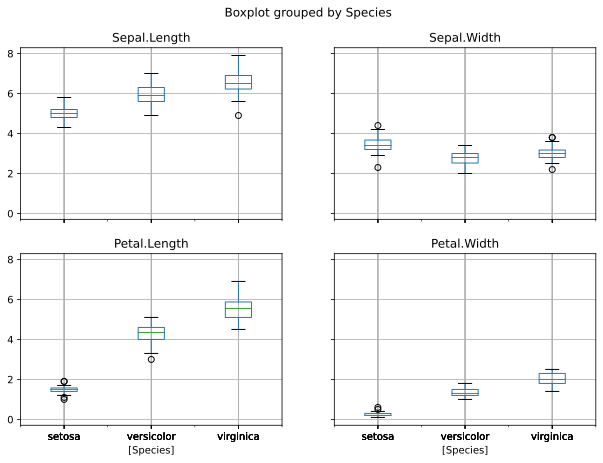

In [8]:
iris.boxplot(column=['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width'], by=['Species'], figsize=(10,7))
#Notice this creates subplots 'all by itself' 

As before, separate your dataframe into 'categories to predict' and 'predictors':

In [9]:
categories = iris[['Species']]
predictors = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']]
predictors.columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']


Create training and test sets

In [10]:
from sklearn.model_selection import train_test_split
pred_train, pred_test, cat_train, cat_test = train_test_split(predictors, categories, test_size=.33, random_state=5)


As before, import the `LogisticRegression` module and create a Logistic Regression classifier object using LogisticRegression() function.

In [11]:
from sklearn.linear_model import LogisticRegression
#Note we use the same `LogisticRegression` function but change the "class"

multimodel = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 5000)

Then, fit your model on the train set using `fit()` and perform prediction on the test set using `predict()`.

In [12]:
multimodel.fit(pred_train, cat_train.Species) #note that in the model fit you have to specifiy the column with the category names to train on
model_pred=multimodel.predict(pred_test)

In [13]:
import math
multi_coefficients = pd.DataFrame(multimodel.coef_)
multi_coefficients.columns = predictors.columns
multi_coefficients.index = ['setosa', 'versicolor', 'virginica'] #recall 'unique' function earlier
multi_coefficients

print(multi_coefficients.applymap(math.exp))

            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
setosa          0.664431     2.332885      0.110197     0.381028
versicolor      1.831750     0.643341      0.851845     0.410404
virginica       0.821644     0.666293     10.652900     6.394865


These coefficients help explain the value of each feature in predicting each particular Species (or category). E.g., the feature carrying the most weight in classifying 'virginica' as 'virginica' is the petal length. We can also see for each feature, there is usually one category that stands apart - this suggests our model should do well.

Let's look at the confusion matrix:

In [14]:
from sklearn import metrics
iris_matrix = metrics.confusion_matrix(cat_test, model_pred)
iris_matrix

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 17]])

Diagonal of the multidimensional array always represents correctly predicted items. Let's convert again to a datafram structure to make it easier to see

In [15]:
pd.DataFrame(iris_matrix, columns=['setosa', 'versicolor', 'virginica'], index=['Predicts_setosa','Predicts_versicolor','Predicts_virginica'])

,setosa,versicolor,virginica
Predicts_setosa,16,0,0
Predicts_versicolor,0,16,1
Predicts_virginica,0,0,17


Evaluate the model (as before) using model evaluation metrics such as accuracy, precision, and recall.

In [16]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
print(classification_report(cat_test, model_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        17
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## A note about baseline measures

In this case, our dataset was pretty equallly weighted among flowers of the 3 types. Sometimes we have datasets where up to 75% or 80% of the values are all of one variety or class. While this can make it a little tricker to get good results, it's still possible. However, a model that simply guessed the most popular class in the 'prediction' category in that case would end up being right with an accuracy score equal to the proportion of that class! (E.g., if you try to predict 'survive' and 70% of people died, then the model would anyway be correct 70% of the time by simply choosing the most popular answer.)

That is why when we have 'biased' datasets, we will always want to provide a "baseline" to show that the model we made improves classification "over and above" the simple baseline model.